In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# New section

dat collection and processing


In [ ]:
#loading data
gold_data = pd.read_csv('/gld_price_data.csv')

In [ ]:
#print first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


explanation =
SPX = capitisation index of companies
GLD = gold price
USD = united satates price
SLV = silver price
EUR = european price (comparision)


In [ ]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
# basic info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting stastical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


relation btw data (positive and negative)

In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

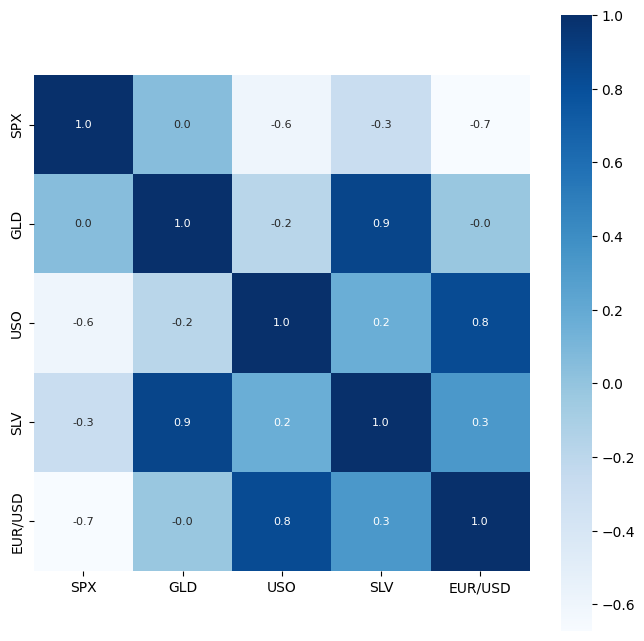

In [ ]:
# constructing heapmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

this explain the relation in the form of diagram for better understanding , it also very easy to understand.

the price of gold and silver is positive so that we can say that if the price of gold wil increase then the price of silver will also increase and vice-versa.
1f = 1 floating point
zero means = no relation

In [ ]:
#correlation for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


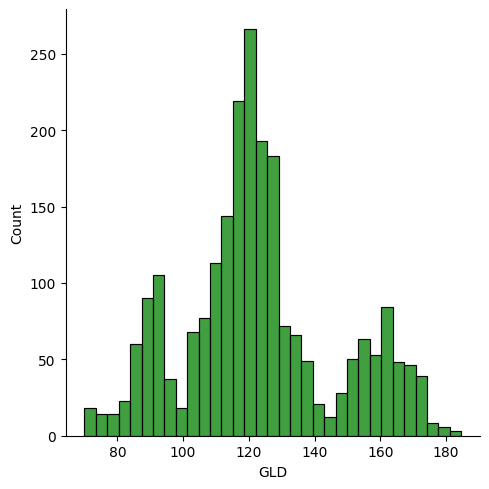

In [ ]:
#checking distibution of gold price
sns.displot(gold_data['GLD'], color='green')

splitting the features and target

In [ ]:
#removing the data column and also seaparating the gold prices
x = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model training:
1= random forest regressor

this works on decision tress
type1 : single decision tree
type2 : random forest (find the mean or median values )

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# traing the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.81589923  81.64360003 115.97040027 127.74250082 120.69630131
 154.71499752 150.16249815 126.16680048 117.54809864 125.95960083
 116.86760078 171.90000076 141.75009847 167.94629865 115.29239979
 118.03080052 138.45320375 169.93700068 159.63920237 160.02919896
 155.08260082 125.66920052 174.2726002  157.07940295 125.18480024
  93.85309974  77.98209986 120.48669985 119.1386995  167.50299973
  88.15370095 125.36200016  90.96330055 117.62090053 121.15309916
 136.35660042 115.56100098 115.46420075 147.16309955 107.18870087
 104.53880255  87.16479791 126.47360045 118.00039988 154.7341983
 119.53259991 108.43700001 108.03179835  93.01300073 127.09359818
  74.26970079 113.58029914 121.22989987 111.38119874 118.92229907
 120.5932996  158.59420039 166.54260173 146.94429653  85.84419885
  94.35560033  86.71989895  90.58460018 119.12560054 126.49230033
 127.58849993 169.51540033 122.23009942 117.41369876  98.43340032
 168.28180123 142.69019842 131.95200166 121.25230244 121.57429949
 119.647700

In [ ]:
# R square values error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error : ", error_score)

R square error :  0.9890326644845374


comparing actual values and predicted values

In [ ]:
Y_test = list(Y_test)

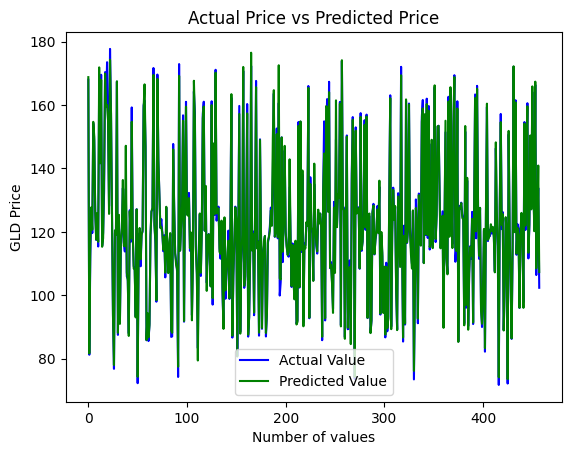

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
